# SVM fitting example on synthetic data

### Imports and set seed for reproducibility

In [1]:
import random
import numpy as np

# Set the random seed for reproducibility.
seed = 16
random.seed(seed)
np.random.seed(seed)

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Import SVM from the ado library.
from ado import SVM

### Generate synthetic data

In [3]:
# Create a synthetic dataset made by two clusters of 100 data points in total,
# with 50 data points having label 1 and 50 data points having label -1.

n_samples = 100
X, y = make_blobs(n_samples=n_samples, centers=2,
                  random_state=seed, cluster_std=2.0)
y[y == 0] = -1

### Fit the model on the synthetic data by using different kernels

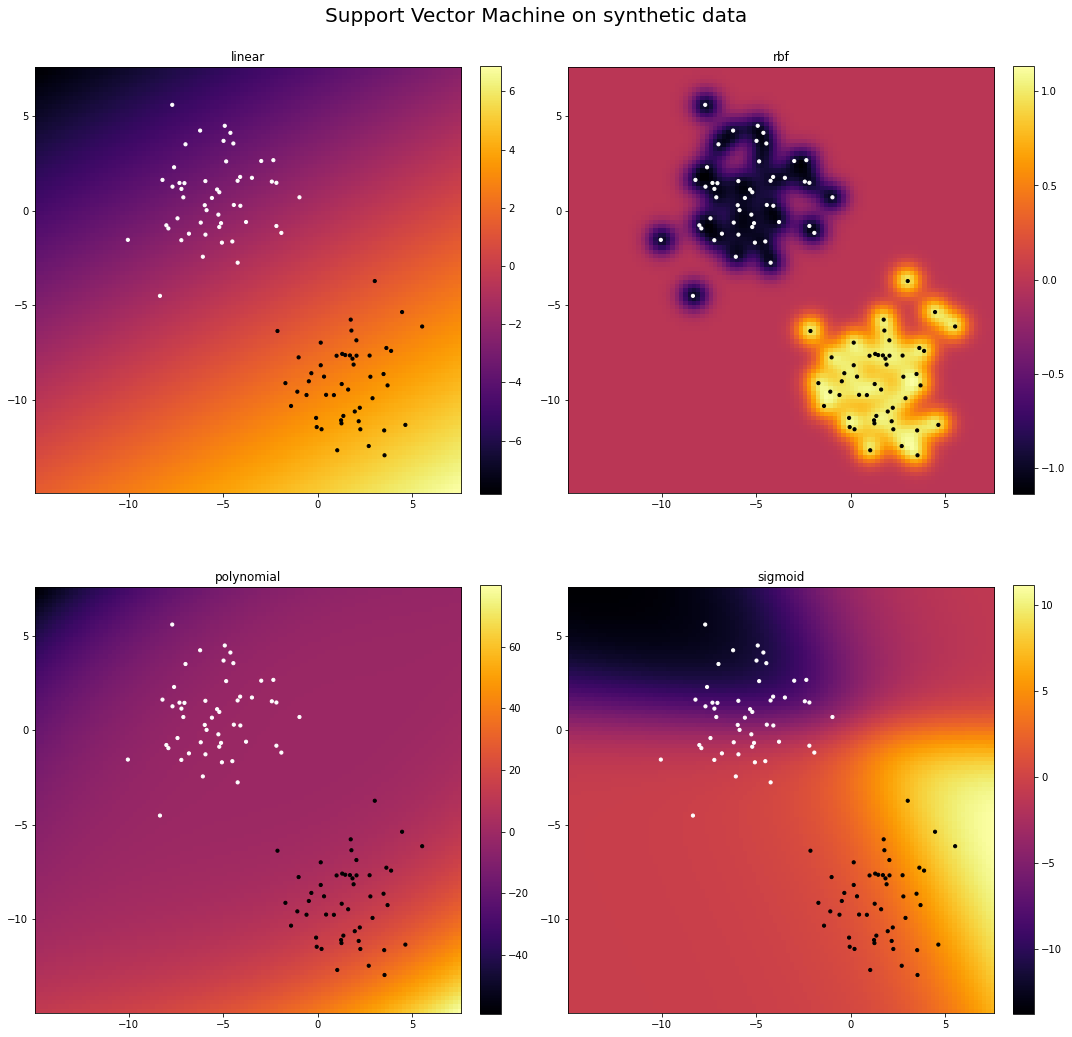

In [12]:
# Define the two types of kernel: linear and radial basis function.
kernel_params = {"linear":{"kernel":"polynomial", "gamma":1.0, "coeff":0.0, "degree":1.0},
               "rbf":{"kernel":"rbf","gamma": 1.5},
               "polynomial":{"kernel":"polynomial","gamma":1.0, "coeff":0.5, "degree":3.0},
               "sigmoid":{"kernel":"sigmoid","gamma":0.05, "coeff":0.1}}

plt.figure(figsize=(15,15))
plt.suptitle("Support Vector Machine on synthetic data", size=20)

for idx, k_info in enumerate(kernel_params.items()):
    k_name, k_params = k_info
    plt.subplot(2, 2, idx + 1)
    plt.title(f"{k_name}")

    # Fit the SVM on the synthetic data.
    model = SVM(C=1.0, tol=1e-3, max_steps=100, seed=seed, **k_params)
    model.fit(X, y)

    # Create a a grid of data points on which running inference in order to obtain
    # a dense decision plane.
    margin = 2
    k = np.linspace(np.min(X) - margin, np.max(X) + margin, num=n_samples)
    xx, yy = np.meshgrid(k, k)
    K = np.stack([xx.flatten(), yy.flatten()], axis=1)

    # Run inference on the grid.
    M = model.decision_function(K).reshape((len(k), len(k)))

    plt.imshow(M, extent=[np.min(X) - margin, np.max(X) + margin, np.min(X) - margin, np.max(X) + margin],
               origin='lower',
               cmap='inferno')
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='gist_yarg')

plt.tight_layout()
plt.show()